In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDrug=pd.read_csv(mouse_drug_data_to_load)
ClinicT=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combDF=pd.merge(mouseDrug,ClinicT, how='outer', on='Mouse ID')

# Display the data table for preview

combDF.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [2]:

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtv=combDF.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':np.mean})

# Preview DataFrame
mtv=mtv.reset_index()                                                                                                                                                                                                                                                                              
mtv.head()
                                                                                                                                   

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
 #Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_TumorVal=combDF.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':sem})
# Preview DataFrame
sem_TumorVal=sem_TumorVal.reset_index()
sem_TumorVal.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames ( mean tumore table)

mtv_formatDf=mtv.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mtv_formatDf=mtv_formatDf.reset_index()
mtv_formatDf

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [5]:
# Minor Data Munging to Re-Format the Data Frames ( sem table)

sem_formatDf=sem_TumorVal.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
sem_formatDf=sem_formatDf.reset_index()
sem_formatDf

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


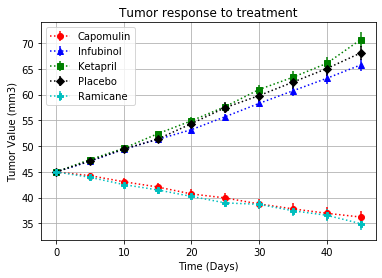

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
xaxis=mtv_formatDf['Timepoint']
ax.errorbar(xaxis,mtv_formatDf['Capomulin'],sem_formatDf['Capomulin'], fmt="o", linestyle=':', color='r',label="Capomulin")
ax.errorbar(xaxis,mtv_formatDf['Infubinol'],sem_formatDf['Infubinol'], fmt="^", linestyle=':', color='b',label="Infubinol")
ax.errorbar(xaxis,mtv_formatDf['Ketapril'],sem_formatDf['Ketapril'], fmt="s", linestyle=':', color='g',label="Ketapril")
ax.errorbar(xaxis,mtv_formatDf['Placebo'],sem_formatDf['Placebo'], fmt="D", linestyle=':', color='k',label="Placebo")
ax.errorbar(xaxis,mtv_formatDf['Ramicane'],sem_formatDf['Ramicane'], fmt="P", linestyle=':', color='c',label="Ramicane")
plt.grid()
plt.title("Tumor response to treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Value (mm3)")
plt.legend()
# Save the Figure
plt.savefig("Tumor response to treatment.png")


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_MetSite=combDF.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':np.mean})

# Preview DataFrame

mean_MetSite=mean_MetSite.reset_index()
mean_MetSite.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_MetSite=combDF.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':sem})

# Preview DataFrame
sem_MetSite=sem_MetSite.reset_index()
sem_MetSite.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames ( Mean MetSite table)

mean_MetSiteFormat=mean_MetSite.pivot( columns='Drug',index='Timepoint', values='Metastatic Sites')

# Preview that Reformatting worked
mean_MetSiteFormat=mean_MetSiteFormat.reset_index()
mean_MetSiteFormat

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [10]:
# Minor Data Munging to Re-Format the Data Frames (Sem MetSite table)

sem_MetSiteFormat=sem_MetSite.pivot( columns='Drug',index='Timepoint', values='Metastatic Sites')

# Preview that Reformatting worked
sem_MetSiteFormat=sem_MetSiteFormat.reset_index()
sem_MetSiteFormat

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


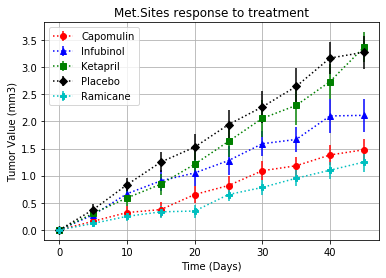

In [11]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
xaxis=mean_MetSiteFormat['Timepoint']
ax.errorbar(xaxis,mean_MetSiteFormat['Capomulin'],sem_MetSiteFormat['Capomulin'], fmt="o", linestyle=':', color='r',label="Capomulin")
ax.errorbar(xaxis,mean_MetSiteFormat['Infubinol'],sem_MetSiteFormat['Infubinol'], fmt="^", linestyle=':', color='b',label="Infubinol")
ax.errorbar(xaxis,mean_MetSiteFormat['Ketapril'],sem_MetSiteFormat['Ketapril'], fmt="s", linestyle=':', color='g',label="Ketapril")
ax.errorbar(xaxis,mean_MetSiteFormat['Placebo'],sem_MetSiteFormat['Placebo'], fmt="D", linestyle=':', color='k',label="Placebo")
ax.errorbar(xaxis,mean_MetSiteFormat['Ramicane'],sem_MetSiteFormat['Ramicane'], fmt="P", linestyle=':', color='C',label="Ramicane")
plt.grid()
plt.title("Met.Sites response to treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Value (mm3)")
plt.legend()
# Save the Figure
plt.savefig("Met.Sites response to treatment.png")

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survRate=combDF.groupby(['Drug','Timepoint']).agg({'Mouse ID':'count'})

# Preview DataFrame
survRate=survRate.reset_index()
survRate=survRate.rename(columns={'Mouse ID':'Mouse Count'})
survRate.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
survRate1=survRate.pivot(columns='Drug',index='Timepoint', values='Mouse Count')
# Preview the Data Frame
survRate2=survRate1.reset_index()
survRate2

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [14]:
# Group by drug to get the unique mouse count and save it to dataframe 
survRate_u=combDF.groupby('Drug')['Mouse ID'].nunique()
survRate_u=survRate_u.to_frame()
survRate_u=survRate_u.transpose()
survRate_u
#surRate_pct

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mouse ID,25,25,25,25,25,25,25,25,25,25


In [15]:
# Create a dataframe(surRate_pct) to hold the survival rate percentages for each drug

col_names=survRate2.columns
surRate_pct = pd.DataFrame(columns = col_names)

drugList=survRate1.columns
# Fill the survival rate percentages dataframe with values from the below calculation
for i in drugList:       
        surRate_pct[i]=survRate2[i]/survRate_u[i][0]*100
            
surRate_pct['Timepoint']=survRate2['Timepoint']
surRate_pct

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,28.0,80.0,44.0,56.0


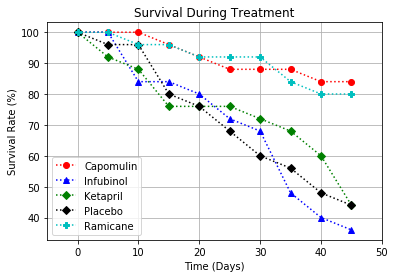

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate the Plot (Accounting for percentages)

ax = surRate_pct.plot( x="Timepoint",y="Capomulin", color="r", label="Capomulin",linestyle=':',marker='o')
surRate_pct.plot(x="Timepoint",y="Infubinol", color="b", label="Infubinol",linestyle=':',marker='^', ax=ax)
surRate_pct.plot(x="Timepoint",y="Ketapril", color="g", label="Ketapril",linestyle=':',marker='D', ax=ax)
surRate_pct.plot(x="Timepoint",y="Placebo", color="k", label="Placebo", linestyle=':',marker='D',ax=ax)
surRate_pct.plot(x="Timepoint",y="Ramicane", color="c", label="Ramicane", linestyle=':',marker='P',ax=ax)

# Show the Figure
#plt.figure(figsize=(20, ))
plt.grid()
plt.xlim(-5,50)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()
plt.show()

# Save the Figure
plt.savefig("Survival During Treatment.png")

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug ( the below output is a series)

mtv_formatDf.head()
a=(mtv_formatDf[drugList].iloc[-1]-mtv_formatDf[drugList].iloc[0])/mtv_formatDf[drugList].iloc[0]*100

# Display the data to confirm
a

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [18]:
# convert above series into a dataframe - percent changes for each drug
pct_df=pd.DataFrame(a)
pct_df=pct_df.reset_index()
pct_df=pct_df.rename(columns={0:'Percentage'})
# Sort the data frame by percentage column and display passing and failing drugs - tumor reduction as True or False
pct_df=pct_df.sort_values('Percentage')
#pct_df['tumorRedc']=np.where(pct_df['Percentage'] > 0, 'Failing Drug', 'Passing Drug')
pct_df['tumorRedc']=pct_df['Percentage'] < 0
# reset index after sort
pct_df=pct_df.reset_index(drop=True)
pct_df

,Drug,Percentage,tumorRedc
0,Ramicane,-22.320900,True
1,Capomulin,-19.475303,True
2,Ceftamin,42.516492,False
3,Infubinol,46.123472,False
4,Zoniferol,46.579751,False
5,Propriva,47.241175,False
6,Placebo,51.297960,False
7,Stelasyn,52.085134,False
8,Naftisol,53.923347,False
9,Ketapril,57.028795,False


In [19]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure


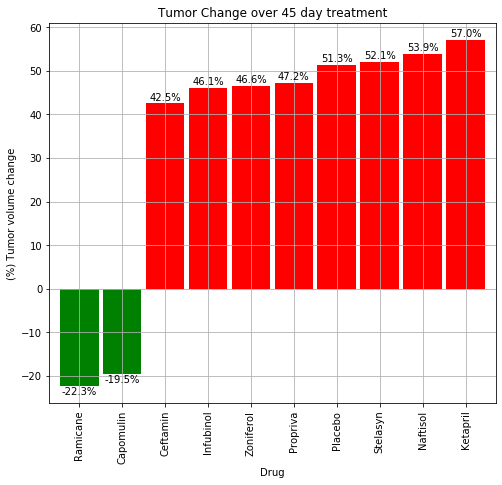

In [20]:
# Plot the bar plot , the below figure plots the bar for all drugs 

#plt.rcParams['figure.dpi']
plt.rcParams["figure.figsize"] = [8,7]
ax = pct_df.plot(kind="bar", x="Drug",y="Percentage", in_layout = True, color=(pct_df["Percentage"] > 0).map({True: 'r', False: 'g'}),width=0.90,legend=False)
plt.grid()
plt.title("Tumor Change over 45 day treatment")
plt.xlabel("Drug")
plt.ylabel("(%) Tumor volume change")

# Use functions to label the percentages of changes

def add_value_labels(ax, spacing=1):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}%".format(y_value)

        # Create annotation
        ax.annotate(
            label,                     # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. 
add_value_labels(ax)

# Save the figure
plt.savefig("Tumor Change over 45 day treatment.png")

#show the figure
plt.show()